In [1]:
import json
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## Check BBOX

In [9]:
dataset_root = Path('/root/synthetic_cabin_1m/syntheticcabin_1mil/processed_syntheticCabin_1m/A_Pillar_Codriver/')
# dataset_root = Path('/root/data/processed/synthetic_cabin_ir/Rear_Mirror/')

In [11]:
with (dataset_root / 'annotations/person_keypoints_train.json').open() as f:
    annotations = json.loads(f.read())
ann_info = {}
img_info = {}
for item in annotations['annotations']:
    ann_info[item['id']] = item
for item in annotations['images']:
    img_info[item['id']] = item

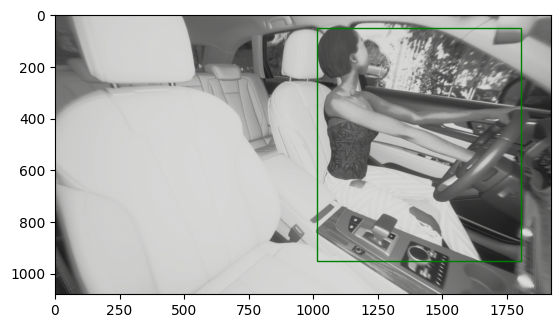

In [12]:
for img_id in img_info.keys():
    fig, ax = plt.subplots()
    img_mat = plt.imread(Path(dataset_root / 'images' / 'train' / img_info[img_id]['file_name']))
    bbox = ann_info[img_id]['bbox']
    x1, y1, x2, y2 = bbox
    w = x2 - x1
    h = y2 - y1
    rect = patches.Rectangle((x1, y1), w, h, linewidth=1, edgecolor='g', facecolor='none', label='high bbox')
    ax.imshow(img_mat)
    ax.add_patch(rect)
    break

## Fix format from xywh to xyxy

In [26]:
from copy import deepcopy

In [27]:
for subset in ['train', 'val', 'test']:
    with (dataset_root / f'annotations/person_keypoints_{subset}.json').open() as f:
        annotations = json.loads(f.read())
    new_items = []
    for item in annotations['annotations']:
        bbox = item['bbox']
        x, y, w, h = bbox
        new_bbox = [x, y, x + w, y + h]
        new_item = deepcopy(item)
        new_item['bbox'] = new_bbox
        new_items.append(new_item)
        # ann_info[int(img_id)]['bbox'] = new_bbox
    annotations['annotations'] = new_items
    with (dataset_root / f'annotations/person_keypoints_{subset}_xyxy.json').open('w') as f:
        json.dump(annotations, f, indent=2)

In [ ]:
for subset in ['train', 'val', 'test']:
    with (dataset_root / f'person_detection_results/ground_truth_human_detection_{subset}.json').open() as f:
        items = json.loads(f.read())
    new_items = []
    for item in items:
        bbox = item['bbox']
        x, y, w, h = bbox
        new_bbox = [x, y, x + w, y + h]
        new_item = deepcopy(item)
        new_item['bbox'] = new_bbox
        new_items.append(new_item)
    with (dataset_root / f'person_detection_results/ground_truth_human_detection_{subset}_xyxy.json').open('w') as f:
        json.dump(new_items, f, indent=2)